In [ ]:
import yfinance as yf

google_stock = yf.download('GOOGL', start='2004-08-19', end='2024-09-16')
google_stock.to_csv('google_stock_data.csv')

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

google_stock = pd.read_csv('google_stock_data.csv')
google_stock.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.504808,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.703765,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.730975,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.617892,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.646101,183772044


In [ ]:
google_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5052 non-null   object 
 1   Open       5052 non-null   float64
 2   High       5052 non-null   float64
 3   Low        5052 non-null   float64
 4   Close      5052 non-null   float64
 5   Adj Close  5052 non-null   float64
 6   Volume     5052 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.4+ KB


In [ ]:
google_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5.052000e+03
mean,46.036868,46.519788,45.561046,46.050108,45.939159,1.169251e+08
std,43.804907,44.288448,43.353492,43.828243,43.727925,1.476164e+08
min,2.482232,2.546046,2.401401,2.502753,2.496571,9.312000e+06
25%,13.132570,13.230918,12.978729,13.138200,13.105748,3.090950e+07
50%,27.758000,27.945351,27.514757,27.719000,27.650533,5.897700e+07
75%,61.156626,61.802250,60.673751,61.107250,60.956313,1.411317e+08
max,190.309998,191.750000,189.029999,191.179993,190.926636,1.643023e+09


In [ ]:
google_stock.shape

(5052, 7)

In [ ]:
google_stock.duplicated().sum()

0

In [ ]:
google_stock.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
google_stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
# Prepare the dataset for Linear Regression
X = google_stock[['Open','High','Low']]  # Using only necessary features that contribute
y = google_stock['Adj Close']                  # Target

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Calculate Adjusted R^2
n = len(y_test)  # Number of observations
p = X.shape[1]   # Number of predictors (features)
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R^2: {r2_adj}")

Mean Squared Error: 0.1607755223563943
R-squared: 0.9999141606610344
Adjusted R^2: 0.999913904933113



Feature Importance (Linear Regression Coefficients):
      Coefficient
Open    -0.573773
High     0.739427
Low      0.832951


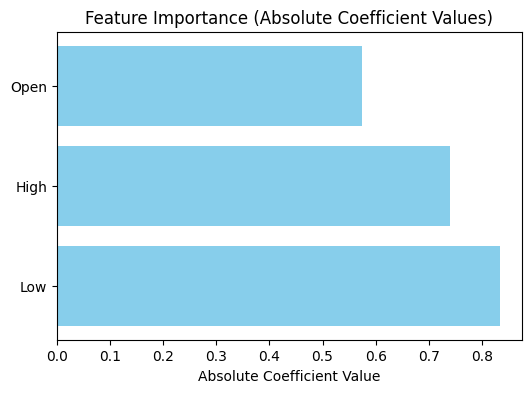

Intercept: 0.007486848976078875


In [ ]:

# Display model coefficients for feature importance
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nFeature Importance (Linear Regression Coefficients):")
print(coefficients)

# Plot feature importance (absolute coefficient values)
coefficients['Abs Coeff'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs Coeff', ascending=False)

plt.figure(figsize=(6,4))
plt.barh(coefficients.index, coefficients['Abs Coeff'], color='skyblue')
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.xlabel('Absolute Coefficient Value')
plt.show()

# Display model intercept
print(f'Intercept: {model.intercept_}')


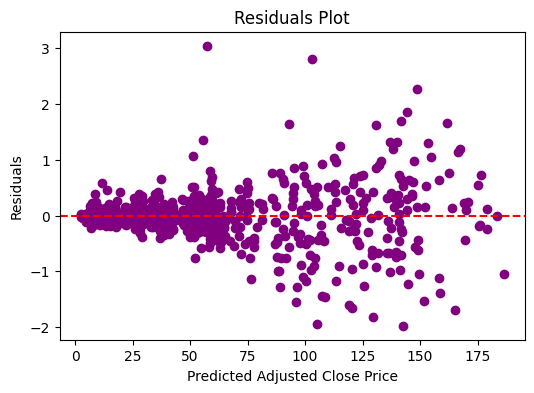

In [ ]:

# Residuals Plot (Error plot)
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Adjusted Close Price')
plt.ylabel('Residuals')
plt.show()


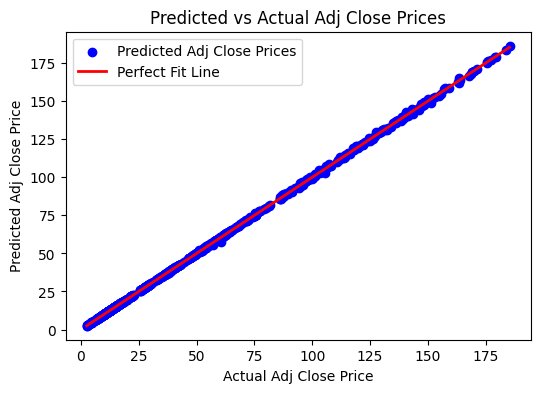

In [ ]:
# Predicted vs. Actual Close Prices Plot
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Adj Close Prices')  # Points where the x-axis is actual and y-axis is predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Fit Line')  # Line representing perfect prediction
plt.title('Predicted vs Actual Adj Close Prices')
plt.xlabel('Actual Adj Close Price')
plt.ylabel('Predicted Adj Close Price')
plt.legend()
plt.show()

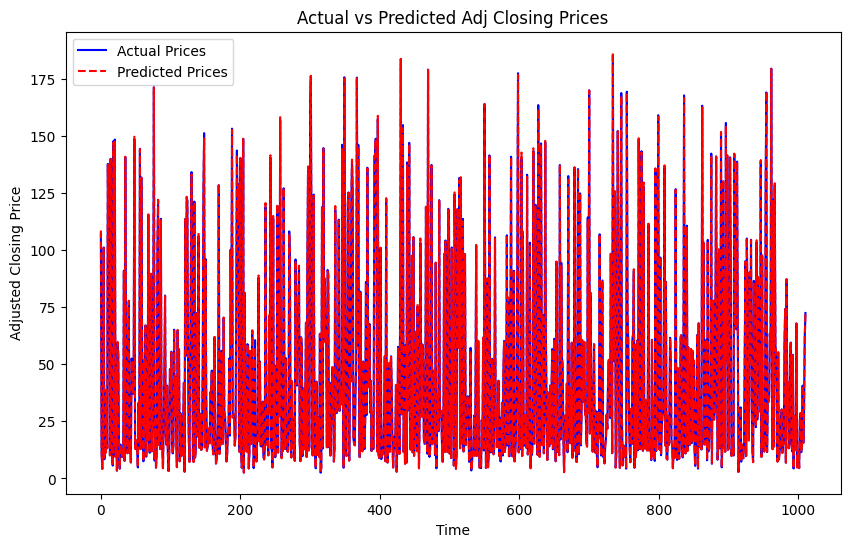

In [ ]:
# Plotting the actual vs predicted stock prices
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Adj Closing Prices')
plt.xlabel('Time')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()